In [12]:
import pytesseract
from PIL import Image

In [13]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

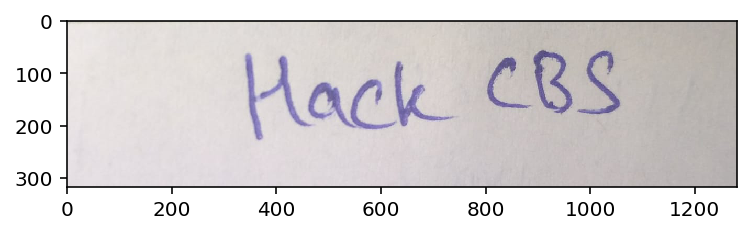

Text in the pic is: Hack CBS


In [23]:
%matplotlib inline
# %pylab inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(r"C:\Users\Akash\Pictures\hack4.jpg")
imgplot = plt.imshow(img)
# image = Image.open(r"C:\Users\Akash\Pictures\final test.jpg")
# image.show()
plt.show()
print("Text in the pic is: "+pytesseract.image_to_string(Image.open(r"C:\Users\Akash\Pictures\hack4.jpg")))

In [6]:
from imutils import paths
import argparse
import cv2
 
def variance_of_laplacian(image):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	return cv2.Laplacian(image, cv2.CV_64F).var()
 
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--images", required=True,
# 	help="path to input directory of images")
# ap.add_argument("-t", "--threshold", type=float, default=100.0,
# 	help="focus measures that fall below this value will be considered 'blurry'")
# args = vars(ap.parse_args())
# loop over the input images

# load the image, convert it to grayscale, and compute the
# focus measure of the image using the Variance of Laplacian
# method
def blur(img):
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = variance_of_laplacian(gray)
    text = "Not Blurry"

    # if the focus measure is less than the supplied threshold,
    # then the image should be considered "blurry"
    if fm < 60:
        text = "Blurry"

    # show the image
    cv2.putText(image, "{}: {:.2f}".format(text, fm), (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
    cv2.imshow("Image", image)
    key = cv2.waitKey(0)

In [8]:
blur(r"C:\Users\Akash\Downloads\101393.jpg")

In [68]:
def remove_lines(img):
    import cv2
    import numpy as np
    img = cv2.imread(img)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    linek = np.zeros((11,11),dtype=np.uint8)
    linek[5,...]=1
    x=cv2.morphologyEx(gray, cv2.MORPH_OPEN, linek ,iterations=1)
    gray-=x
    cv2.imshow('gray',gray)
    cv2.waitKey(0)   
    img=mpimg.imread(img)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

Best angle: 0


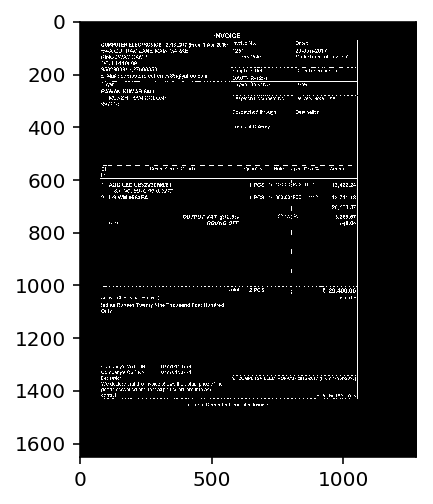

In [50]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
from scipy.ndimage import interpolation as inter

input_file = sys.argv[1]

img = im.open(r"C:\Users\Akash\Downloads\144282.jpg")

# convert to binary
wd, ht = img.size
pix = np.array(img.convert('1').getdata(), np.uint8)
bin_img = 1 - (pix.reshape((ht, wd)) / 255.0)
plt.imshow(bin_img)
plt.savefig('binary.png')

def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score


delta = 1
limit = 5
angles = np.arange(-limit, limit+delta, delta)
scores = []
for angle in angles:
    hist, score = find_score(bin_img, angle)
    scores.append(score)

best_score = max(scores)
best_angle = angles[scores.index(best_score)]
print('Best angle: {}'.format(best_angle))

# correct skew
data = inter.rotate(bin_img, best_angle, reshape=False, order=0)
img = im.fromarray((255 * data).astype("uint8")).convert("RGB")
plt.imshow(img)
img.save('skew_corrected.png')

In [20]:
def crop(image):
    import cv2
    import numpy as np
    #img = cv2.imread("test.png")
    img = cv2.imread(r"C:\Users\Akash\Downloads\132819.jpg")
    blurred = cv2.blur(img, (3,3))
    canny = cv2.Canny(blurred, 50, 200)

    ## find the non-zero min-max coords of canny
    pts = np.argwhere(canny>0)
    y1,x1 = pts.min(axis=0)
    y2,x2 = pts.max(axis=0)

    ## crop the region
    cropped = img[y1:y2, x1:x2]
    cv2.imwrite("cropped.png", cropped)

    tagged = cv2.rectangle(img.copy(), (x1,y1), (x2,y2), (0,255,0), 3, cv2.LINE_AA)
    return cropped

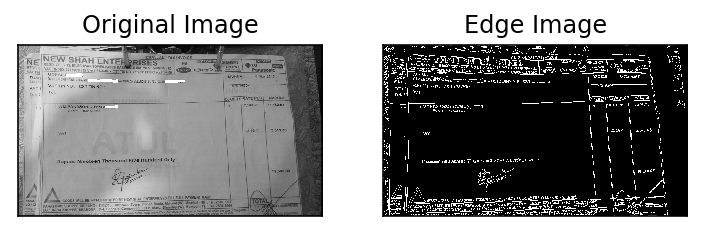

In [120]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(r"C:\Users\Akash\Downloads\101242.jpe",0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [30]:
import cv2 
import numpy as np 
  
# Reading the input image 
img = cv2.imread(r"C:\Users\Akash\Downloads\144282.jpg", 0) 
  
# Taking a matrix of size 5 as the kernel 
kernel = np.ones((5,5), np.uint8) 
  
# The first parameter is the original image, 
# kernel is the matrix with which image is  
# convolved and third parameter is the number  
# of iterations, which will determine how much  
# you want to erode/dilate a given image.  
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,11,2)
img_erosion = cv2.erode(th3, kernel, iterations=1) 
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1) 
  
cv2.imshow('Input', img) 
cv2.imshow('Threshold',th3)
cv2.imshow('Erosion', img_erosion) 
cv2.imshow('Dilation', img_dilation) 
  
cv2.waitKey(0)

0

In [18]:
import numpy as np
import cv2

gray = cv2.imread(r"C:\Users\Akash\Downloads\144282.jpg")
edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2.imwrite('edges-50-150.jpg',edges)
minLineLength=100
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=80)

a,b,c = lines.shape
for i in range(a):
    x = lines[i][0][0] - lines [i][0][2]
    y = lines[i][0][1] - lines [i][0][3]
    if x!= 0:
        if abs(y/x) <1:
            cv2.line(gray, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (255, 255, 255), 1, cv2.LINE_AA)

se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE , (3,3))
gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, se)
cv2.imwrite('houghlines.jpg', gray)
cv2.imshow('img', gray)
cv2.waitKey(0)


-1

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def thresholding(image):
    img = cv2.imread(r"C:\Users\Akash\Downloads\144282.png",0)
#     img = cv2.medianBlur(img,5)

    ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                cv2.THRESH_BINARY,11,2)
    th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,11,2)

    # titles = ['Original Image', 'Global Thresholding (v = 127)',
    #             'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    # images = [img, th1, th2, th3]

    # for i in range(4):
    #     plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    #     plt.title(titles[i])
    #     plt.xticks([]),plt.yticks([])
    # plt.show()
    return th3

In [15]:
def tesocr(image):
  img=mpimg.imread(image)
  imgplot = plt.imshow(img)
  plt.axis('off')
  plt.show()
  result=pytesseract.image_to_string(Image.open(image))
  words=result.split()
  str=""
  for i in words:
    str=str+i+" "
#   print(str)
  print(result)
  return str

In [16]:
import re
def ocr(img):
#     crop(img)
#     skew(img)
    str=tesocr(img)
    result= re.search(r'OM ELECTRONICS',str)
#     print(result)
    if result != None:
        val=3
    else:
        result= re.search(r'RETAIL INVOICE/CASH MEMO/BILL/TAX INVOICE',str)
        if result !=None:
            val=4
        else:
            result=re.search(r'COMPUTER ELECTRONICS',str)
            if result != None:
                val=1
            else:
                val=2
    print(val)
        
    

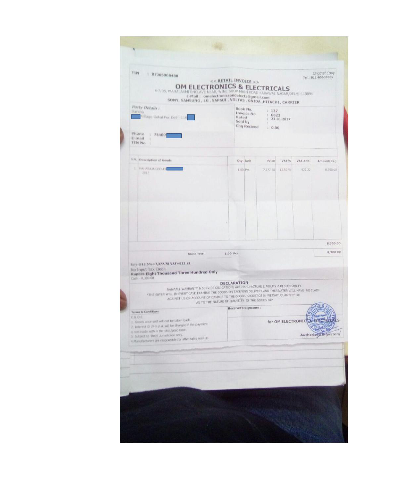

OM ELECTRONICS & ELECTRICALS

t Thousand Three Mundred Only

 

DECLARATION
3


In [17]:
ocr(r"C:\Users\Akash\Downloads\132889_.jpg")

In [27]:
img=crop(r"C:\Users\Akash\Downloads\132819_.jpg")

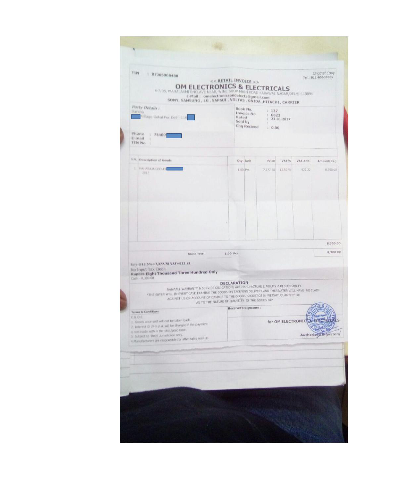

OM ELECTRONICS & ELECTRICALS

t Thousand Three Mundred Only

 

DECLARATION


In [28]:
str=tesocr(r"C:\Users\Akash\Downloads\132819_.jpg")

In [58]:
import re
def get_invoice(str):   
    invoice = re.search(r'Invoice No.(.*?)Delivery ',str).group(1)
    print(invoice[6:-12])

In [59]:
def get_price(str):
    price=re.search(r"Totall (.*?) ‘Amount Chargeable",str).group(1)
    print(price[10:])

In [60]:
def get_date(str):   
    date = re.search(r'Invoice No.(.*?)Delivery ',str).group(1)
    print(date[-12:])

In [61]:
get_invoice(str)

 1251 


In [62]:
get_date(str)

29-Jun-2017 


In [63]:
get_price(str)

29,400.00
